# <div class="alert alert-block alert-info"> <center>An Analysis of the House and Senate Campaign Finance</center></div>

**Install SpaCy** 
<br>(import when use)
<br>conda config --add channels conda-forge
<br>conda install spacy
<br>python -m spacy.en.download
<br>python -m spacy download en 
<br><br>**Install Gensim** 
<br>(import when use)
<br>pip install gensim
<br><br>**Install pyLDAvis** 
<br>(import when use)
<br>pip install pyldavis 

## <div class="alert alert-block alert-success"><center>Project Description</center>
<br>In the political campaign seasons, analyses abound with the candidates' profiles, political experiences, campaign slogans, signature issues and strategies, advantages and disadvantages, etc. However, **the financial resource they possess is less discussed in the mass media. The economic behaviors of political figures and groups, who have an absolute influence on the economy, are seldom evaluated from a financial angle.**
<br><br><li>**Are the campaign strategies in different states similar to each other?**
<br><li>**Is politics a money game?** How much difference could money make in an election? If those who spent the most won at last? 
<br><li>**How did the candidates spend their contributions?** Did they spend the money right in the campaign trail?  
<br>Let us take a look at the **disbursements dataset of the senator candidates and representative candidates in 2018 election cycles** to find out the answers to the above questions.
    
<img src="hs.png" width=70% height=70% />
<br>Picture source: https://classic.fec.gov/disclosurehs/hsnational.do

## <div class="alert alert-block alert-success"><center>Data Source</center>
Campaign committees are required to disclose all specific disbursements, contributions to other federal candidates or parties or other committees, as well as all loan repayments. Operating expenses, contributions to state or local candidates...must be disclosed when the amount paid to any one vendor exceeds $200 in an election cycle. You can learn more about the reporting requirements for candidates by reviewing the FEC's Campaign Guide (https://classic.fec.gov/pdf/candgui.pdf).
<br><br>The disbursement datasets are provided by the **Federal Election Commission** online.These files contain **all itemized disbursements reported by a candidate for either the House or Senate during the current election cycle**. This includes any candidate who ran in a regular House or Senate campaign, along with all candidates in special elections in either the odd numbered year or the election year. **Each row in the file contains information about the committee (and the candidate) that filed the report, along with the name and address of the entity that received the payment, the date and amount of the transaction, a description of its purpose along with links to other transactions that might be associated.** In the dataset of **Candidate Summary Action** contains the information of each candidate's general information and political party information and their financial activities. In the dataset of **Election Reuslts** contains the results for the election.
<br><br>**The URL of the raw data is:** 
<br>https://classic.fec.gov/data/CandidateDisbursement.do?format=html 
<br>https://www.fec.gov/introduction-campaign-finance/election-and-voting-information/<br>https://classic.fec.gov/data/CandidateSummary.do?format=html&election_yr=2018
<br><br>**The file name of the downloaded datasets is:** 
<br>all_house_senate_2018.csv
<br>Election_results_2018.xlsx
<br>CandidateSummaryAction_2018.csv
<br>column_description.csv

## <div class="alert alert-block alert-success"><center>Data Description<center>

### <li>**Read Files**

In [1]:
import pandas as pd
df_2018=pd.read_csv('all_house_senate_2018.csv')
df_2018_candidate_summary=pd.read_csv('CandidateSummaryAction_2018.csv')
result_2018_excel = pd.ExcelFile('Election_results_2018.xlsx')
df_result_2018_senate = result_2018_excel.parse('2018 US Senate Results by State', usecols='E,I,V')
df_result_2018_house = result_2018_excel.parse('2018 US House Results by State', usecols='E,I,V')
df_result_2018 = df_result_2018_senate.append(df_result_2018_house)

/Users/zhanghuishan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### <li>**Data Size (1,063,910 rows * 26 columns)**

In [2]:
df_2018.shape

(1063910, 26)

### <li>**Column Name Explanation**

In [3]:
df_2018.columns 

Index(['com_id', 'com_nam', 'can_id', 'can_nam', 'ele_yea', 'can_off',
       'can_off_sta', 'can_off_dis', 'lin_num', 'lin_ima', 'rec_com_id',
       'rec_nam', 'rec_str1', 'rec_str2', 'rec_cit', 'rec_sta', 'rec_zip',
       'dis_dat', 'dis_amo', 'dis_pur_des', 'mem_cod', 'mem_tex', 'cat_cod',
       'cat_des', 'tra_id', 'bac_ref_id'],
      dtype='object')

#### **Use the code below to get the explanation of any tag or check the descriptions of all columns below.**

In [4]:
pd.set_option('max_colwidth',1000)
cd=pd.read_csv('column_description.csv',index_col=None)
cd[cd.Tag == 'rec_nam'][['Tag','Explanation']] # Check what is 'rec_nam'

,Tag,Explanation
11,rec_nam,Name of the person or vendor or other entity receiving this payment from the committee


In [5]:
# The full column description file
cd.iloc[:26,:].style.set_properties(**{'text-align': 'left'})

,Tag,Field Name,Data Type,Description,Range,Explanation
0,com_id,Committee ID,Character,Character C followed by eight digits,9 characters,Unique nine digit identifier used by the Commission to identify each political committee. In general committee id's begin with the letter C which is followed by eight
1,com_nam,Committee Name,Character,Name of committee or other entity registered with the FEC,Max 90 characters,This is the name of the committee
2,can_id,Candidate ID,Character,nan,9 characters,"First character indicates office sought - H=House, S=Senate, P=Presidential. Columns 3-4 are the state abbreviation for Congressional candidates"
3,can_nam,Candidate name,Character,Name of the candidate,Max 38 characters,List of all disclosure filings for this committee
4,ele_yea,Election year,Number,nan,4 characters,General election year of the cycle in which this candidate is running
5,can_off,Candidate Office,Text,Office abbreviation,1 character,P=President; S=Senate; H=House
6,can_off_sta,Candidate Office State,Character,Postal abbreviation for State,2 characters,nan
7,can_off_dis,Candidate Office District,Number,District number for House candidates,2 characters,nan
8,lin_num,Line number from Detailed Summary Page of FEC Form 3,Character,category of disbursement based on detailed summary page of FEC Form 3,max 12 characters,Description of Form 3 (See page 6 of these instructions)
9,lin_ima,Link to image presentation,URI,Page where transaction may be viewed as image,11 or 18 characters,nan


Important columns in <b> df_2018_candidate_summary </b> are:
<ol>
<li> can_id: Candidate ID. Which is the key to use when merging to df_2018.</li>
<li> can_par_aff: Candidate Party Affiliation. To find out what party each candidate belongs to.</li>
</ol>

Important columns in <b> df_result_2018 </b> are:
<ol>
<li> FEC ID#: Candidate's FEC ID. Which is the key to use when merging to df_2018.</li>
<li> CANDIDATE NAME: Candidate Name.</li>
<li> GE WINNER INDICATOR: The indicator will have 'W' for the winner. To find out which candidate won the election.</li>
</ol>

## <div class="alert alert-block alert-success"><center>Preparing Work and Data Cleaning<center>

### <li>Import Packages

In [6]:
pd.set_option('precision', 1) 

import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import seaborn as sns
import sklearn as sk
import sklearn.tree as tree
import pydotplus
from IPython.display import Image
from collections import OrderedDict
import matplotlib.pyplot as plt

import spacy
from spacy.lang.en import English
import string
import nltk
import random
from gensim import corpora 
import pickle
import gensim
import pyLDAvis.gensim 

### <li>**Wash Columns**

#### Change $amount strings to numbers

In [7]:
df_2018.dis_amo.replace({r'\$':''},regex=True,inplace=True)
df_2018.dis_amo.replace({r'\,':''},regex=True,inplace=True)
df_2018.dis_amo.replace({r'\(':'-'},regex=True,inplace=True)
df_2018.dis_amo.replace({r'\)':''},regex=True,inplace=True)

df_2018.dis_amo = pd.to_numeric(df_2018.dis_amo)
pd.set_option('display.float_format', '{:.2f}'.format)
df_2018.dis_amo.sum()

2865981216.3499994

#### Get names' forms unified

In [8]:
df_2018['can_nam'] = df_2018.can_nam.str.lstrip()
df_2018.can_nam.replace({r'\, ':'-'},regex=True,inplace=True)
df_2018.can_nam.replace({r'\ ':'-'},regex=True,inplace=True)

### <li>**Add Columns-Parties and Win**

In [9]:
# Add which party a candidate belong to
df_2018 = pd.merge(df_2018,df_2018_candidate_summary[['can_id','can_par_aff']],on='can_id', how='left')

# Add Win - if a candidate is the election winner
list_2018_winner=list(df_result_2018[df_result_2018['GE WINNER INDICATOR']=='W']['FEC ID#'].str.rstrip())
df_2018['win'] = df_2018.apply(lambda x: (1 if x.can_id in list_2018_winner else 0),axis=1)

### <li> Nan Value Check
#### We are only using can_id, can_nam, can_off, can_off_sta, dis_pur_des, cat_des, dis_amo, win and can_par_aff columns. There are only two of them "dis_pur_des, cat_des" have nan to be cleaned. This work will be done later in the third part.

In [10]:
df_2018.isna().sum()

com_id               0
com_nam              0
can_id               0
can_nam              0
ele_yea              0
can_off              0
can_off_sta          0
can_off_dis          0
lin_num              0
lin_ima              0
rec_com_id     1048517
rec_nam            901
rec_str1          5509
rec_str2        870463
rec_cit           4246
rec_sta           4432
rec_zip           5878
dis_dat            111
dis_amo              0
dis_pur_des       8013
mem_cod         805494
mem_tex         926421
cat_cod         722740
cat_des         722868
tra_id               0
bac_ref_id      860292
can_par_aff         22
win                  0
dtype: int64

### <li> Drop Invalid Data
#### Returned money and negative money amount should be excluded because they are not expense.

In [11]:
# There's a cat_des category "refunds of contribution" that should be deleted. 
# It's not the money candidates spent but returned. About 11 millions in total.

df_2018_RoC=df_2018[df_2018.cat_des=='Refunds of Contributions']
throwout = list(df_2018_RoC.dis_pur_des)
wholedata = list(df_2018.dis_pur_des)
rest = list(set(wholedata)^set(throwout))
df_2018 = df_2018[df_2018.dis_pur_des.isin(rest)]

# Also delete dis_pur_des with "refund|return|memo|void"
df_2018['dis_purpose']=df_2018.dis_pur_des.str.lower()
df_2018_RoC2 = df_2018[df_2018.dis_purpose.str.contains('refund|return|memo|void')]
throwout2 = list(df_2018_RoC2.dis_purpose)
wholedata2 = list(df_2018.dis_purpose)
rest2 = list(set(wholedata2)^set(throwout2))
df_2018 = df_2018[df_2018.dis_purpose.isin(rest2)]

# Delete negative amount in the dataset
df_2018_neg = df_2018[df_2018.dis_amo < 0]
throwout3 = list(df_2018_neg.dis_amo)
wholedata3 = list(df_2018.dis_amo)
rest3 = list(set(wholedata3)^set(throwout3))
df_2018 = df_2018[df_2018.dis_amo.isin(rest3)]

len(df_2018)

973158

## <div class="alert alert-block alert-success"><center>Topic One:  How the disbursement amounts vary from state to state<center>

## <center><li>Examine the Columns Used in This Part

In [12]:
df_state=df_2018[['can_off_sta','can_off','dis_amo']]

In [13]:
df_state.head()

,can_off_sta,can_off,dis_amo
0,AK,H,300.00
1,AK,H,3414.98
2,AK,H,2.00
3,AK,H,7000.00
4,AK,H,1394.47


## <center><li>Machine Learning-Regression

### DECISION TREE REGRESSOR

In [14]:
#import sklearn.tree as tree
#from IPython.display import Image  
#import pydotplus

In [15]:
dt = tree.DecisionTreeRegressor(max_depth = 3)

In [16]:
df2_2018=df_state.copy()

In [17]:
df2_2018=pd.get_dummies(columns=['can_off'],data=df2_2018)

In [18]:
df2_2018.head()

,can_off_sta,dis_amo,can_off_H,can_off_S
0,AK,300.00,1,0
1,AK,3414.98,1,0
2,AK,2.00,1,0
3,AK,7000.00,1,0
4,AK,1394.47,1,0


In [19]:
df2_2018=pd.get_dummies(columns=['can_off_sta'],data=df2_2018)

In [20]:
df2_2018.head()

,dis_amo,can_off_H,can_off_S,can_off_sta_AK,can_off_sta_AL,can_off_sta_AR,can_off_sta_AS,can_off_sta_AZ,can_off_sta_CA,can_off_sta_CO,...,can_off_sta_TN,can_off_sta_TX,can_off_sta_UT,can_off_sta_VA,can_off_sta_VI,can_off_sta_VT,can_off_sta_WA,can_off_sta_WI,can_off_sta_WV,can_off_sta_WY
0,300.00,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3414.98,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.00,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7000.00,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1394.47,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X = df2_2018.drop('dis_amo',axis=1)
Y = df2_2018.dis_amo

In [22]:
X.head()

,can_off_H,can_off_S,can_off_sta_AK,can_off_sta_AL,can_off_sta_AR,can_off_sta_AS,can_off_sta_AZ,can_off_sta_CA,can_off_sta_CO,can_off_sta_CT,...,can_off_sta_TN,can_off_sta_TX,can_off_sta_UT,can_off_sta_VA,can_off_sta_VI,can_off_sta_VT,can_off_sta_WA,can_off_sta_WI,can_off_sta_WV,can_off_sta_WY
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
dt.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

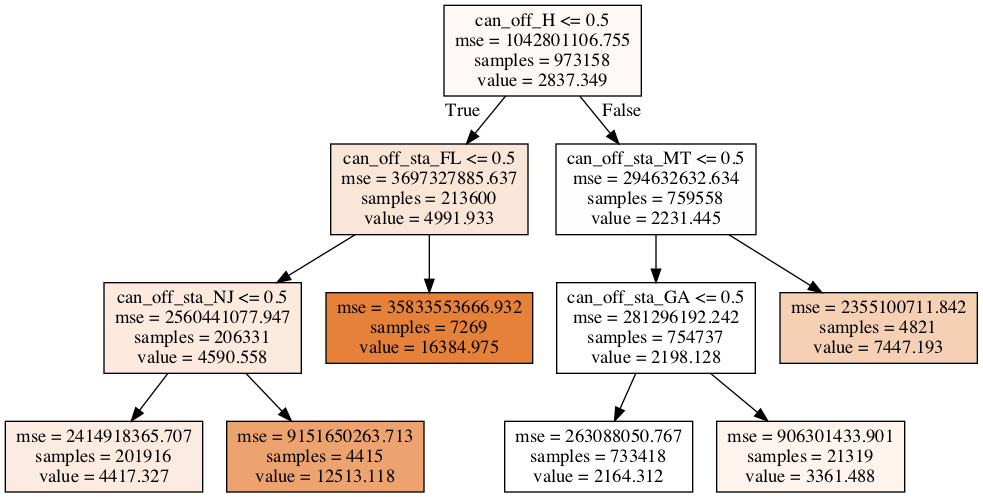

In [24]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\SIMRAN\Anaconda3\Library\bin\graphviz'
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

## <center><li>Validate the Finding

In [25]:
df2=df_2018.groupby(by=['can_off_sta','can_off'])['dis_amo'].agg(['mean','sum']).rename(columns={'mean':'average_disbursements','sum':'total_disbursements'})
df2.head(2)

,,average_disbursements,total_disbursements
can_off_sta,can_off,,
AK,H,1713.86,3264904.92
AL,H,1540.80,14109078.20


In [26]:
df2['total_disbursements']=df2['total_disbursements'].astype(str)

In [27]:
df2.average_disbursements.nlargest()

can_off_sta  can_off
FL           S         16384.98
NJ           S         12513.12
TN           S          8357.52
AL           S          8058.76
MT           H          7447.19
Name: average_disbursements, dtype: float64

### HOUSE

In [28]:
df_house=df_2018[df_2018.can_off=='H'].groupby('can_off_sta')['dis_amo'].agg(['mean','sum']).rename(columns={'mean':'average_disbursements','sum':'total_disbursements'})

In [29]:
house_largest=df_house.average_disbursements.nlargest().to_frame()

In [30]:
house_largest

,average_disbursements
can_off_sta,
MT,7447.19
GA,3361.49
ME,3092.02
NJ,2944.80
PA,2823.43


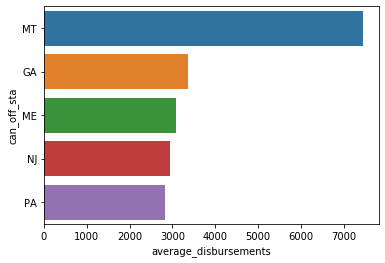

In [31]:
sns.barplot(y=house_largest.index,x='average_disbursements',data=house_largest)

### SENATE

In [32]:
df_senate=df_2018[df_2018.can_off=='S'].\
groupby('can_off_sta')['dis_amo'].agg(['mean','sum']).\
rename(columns={'mean':'average_disbursements','sum':'total_disbursements'})

In [33]:
df_senate=df_senate.average_disbursements.nlargest().to_frame()
df_senate

,average_disbursements
can_off_sta,
FL,16384.98
NJ,12513.12
TN,8357.52
AL,8058.76
CA,7392.64


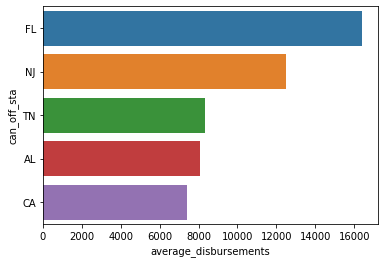

In [34]:
sns.barplot(y=df_senate.index,x='average_disbursements',data=df_senate)

### <div class="alert alert-block alert-warning">Conclusion and Managerial Insight:<br><br>In the elections for the House, the candidates from Montana, Georgia and Maine spent more contribution than candidates from Rhode Island and Idaho.<br><br>In the elections for the Senate, the the candidates from Florida, New Jersey(east) are spending more money than states like Illinois and Delaware.<br><br>According to this finding for a candidate to stand in the election at the HOUSE in Montana an average of 7,447 should be spent as disbursement money,while an average of 16384 should be spent for a candidate to stand in the election in Florida<br><br>Typical people would think California or New York might be the one spending the most money but it turns out New Jersey and Montana was spent the most<br><br>According to the findings almost double the amount of disbursement money should be spent for a candidate to stand at the SENATE than the HOUSE<br><br>In the house every state is represented according to its population with larger states getting more representatives than the smaller ones,the population of states like California and New York is much more than Montana and Georgia thus they will have more number of representatives but they are spending less amount of money when compared to Monata and Georgia

## <div class="alert alert-block alert-success"><center>Topic Two: Does disbursement amout affect the campaign result?<center>

## <center><li>Examine the Columns Used in This Part

In [35]:
# Columns used in this part
df_2018_cluster=df_2018[['can_id','can_nam','can_off','dis_amo', 'win', 'can_par_aff']]
df_2018_cluster.head()
len(df_2018_cluster)

,can_id,can_nam,can_off,dis_amo,win,can_par_aff
0,H6AK00045,YOUNG-DONALD-E,H,300.00,1,REP
1,H6AK00045,YOUNG-DONALD-E,H,3414.98,1,REP
2,H6AK00045,YOUNG-DONALD-E,H,2.00,1,REP
3,H6AK00045,YOUNG-DONALD-E,H,7000.00,1,REP
4,H6AK00045,YOUNG-DONALD-E,H,1394.47,1,REP


973158

## <center><li>Machine Learning-Clustering

## Prepare data from clustering

<div class="alert alert-block alert-warning">NOTE: Use Democratic and Republican parties to analysis the disbursement amounts on house and senate separately

In [36]:
df_2018_house = df_2018_cluster[(df_2018_cluster.can_off=='H') & ((df_2018.can_par_aff == 'DEM') | \
                                                                  (df_2018.can_par_aff == 'REP'))]\
                                                                    .groupby(['can_nam'])[['dis_amo']].sum()

In [37]:
df_2018_senate =  df_2018_cluster[(df_2018_cluster.can_off=='S') & ((df_2018.can_par_aff == 'DEM') | \
                                                                    (df_2018.can_par_aff == 'REP'))] \
                                                                    .groupby(['can_nam'])[['dis_amo']].sum()

In [38]:
df_2018_house.reset_index(inplace=True)
df_2018_senate.reset_index(inplace=True)

In [39]:
df_2018_house.head()
df_2018_senate.head()

,can_nam,dis_amo
0,AARESTAD-DAVID,211005.50
1,ABDULAHI-JAMAL-MR.,95456.90
2,ABEL-KEVIN,864877.70
3,ABRAHAM-RALPH-LEE-DR.-JR.,1036466.74
4,ABRAMS-JOHN-E.,20.00


,can_nam,dis_amo
0,ABBOUD-DEEDRA,101013.87
1,ACKISON-MELISSA,66818.65
2,ANDERSON-CONSUELO-E,13785.59
3,ARLETT-ROB,237100.95
4,ARPAIO-JOE,2788203.49


In [40]:
df_2018_house = pd.merge(df_2018_house,df_2018[['can_nam','can_id']],\
                                            on='can_nam',how='left')

In [41]:
df_2018_senate = pd.merge(df_2018_senate,df_2018[['can_nam','can_id']],\
                                            on='can_nam',how='left')

In [42]:
df_2018_house.drop_duplicates(inplace=True)
df_2018_senate.drop_duplicates(inplace=True)

In [43]:
df_2018_house.reset_index(inplace=True)
df_2018_senate.reset_index(inplace=True)

In [44]:
df_2018_house=df_2018_house.drop(columns='index',axis=1)
df_2018_senate=df_2018_senate.drop(columns='index',axis=1)

In [45]:
df_2018_house.head()
df_2018_senate.head()

,can_nam,dis_amo,can_id
0,AARESTAD-DAVID,211005.50,H8CO06237
1,ABDULAHI-JAMAL-MR.,95456.90,H8MN05163
2,ABEL-KEVIN,864877.70,H8GA06377
3,ABRAHAM-RALPH-LEE-DR.-JR.,1036466.74,H4LA05221
4,ABRAMS-JOHN-E.,20.00,H8NM01356


,can_nam,dis_amo,can_id
0,ABBOUD-DEEDRA,101013.87,S8AZ00122
1,ACKISON-MELISSA,66818.65,S8OH00094
2,ANDERSON-CONSUELO-E,13785.59,S8HI00194
3,ARLETT-ROB,237100.95,S8DE00145
4,ARPAIO-JOE,2788203.49,S8AZ00247


In [46]:
df_2018_house['win'] = df_2018_house.apply(lambda x: (1 if x.can_id in list_2018_winner else 0),axis=1)
df_2018_senate['win'] = df_2018_senate.apply(lambda x: (1 if x.can_id in list_2018_winner else 0),axis=1)

In [47]:
df_2018_house.head()
df_2018_senate.head()

,can_nam,dis_amo,can_id,win
0,AARESTAD-DAVID,211005.50,H8CO06237,0
1,ABDULAHI-JAMAL-MR.,95456.90,H8MN05163,0
2,ABEL-KEVIN,864877.70,H8GA06377,0
3,ABRAHAM-RALPH-LEE-DR.-JR.,1036466.74,H4LA05221,1
4,ABRAMS-JOHN-E.,20.00,H8NM01356,0


,can_nam,dis_amo,can_id,win
0,ABBOUD-DEEDRA,101013.87,S8AZ00122,0
1,ACKISON-MELISSA,66818.65,S8OH00094,0
2,ANDERSON-CONSUELO-E,13785.59,S8HI00194,0
3,ARLETT-ROB,237100.95,S8DE00145,0
4,ARPAIO-JOE,2788203.49,S8AZ00247,0


In [48]:
df_2018_house=df_2018_house.drop(columns=['can_id','can_nam'],axis=1)
df_2018_senate=df_2018_senate.drop(columns=['can_id','can_nam'],axis=1)

## Clustering

### House

In [49]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3, random_state=0)
clu.fit(df_2018_house)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [50]:
df_2018_house['cluster'] = clu.labels_

In [51]:
df_2018_house.groupby('cluster').mean()

,dis_amo,win
cluster,,
0,244364.93,0.11
1,7721323.46,0.57
2,2393284.33,0.63


### Senate

In [52]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3, random_state=0)
clu.fit(df_2018_senate)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [53]:
df_2018_senate['cluster'] = clu.labels_

In [54]:
df_2018_senate.groupby('cluster').mean()

,dis_amo,win
cluster,,
0,1741632.70,0.11
1,85331553.38,0.50
2,26082547.00,0.59


## <center><li>Validate the Finding

### House

In [55]:
df_2018_house_binned = df_2018_house.copy()

In [56]:
df_2018_house_binned['dis_amo_binned'] = pd.cut(df_2018_house_binned.dis_amo, \
                                            bins=[250000, 2000000, 3500000, 5000000,10000000])

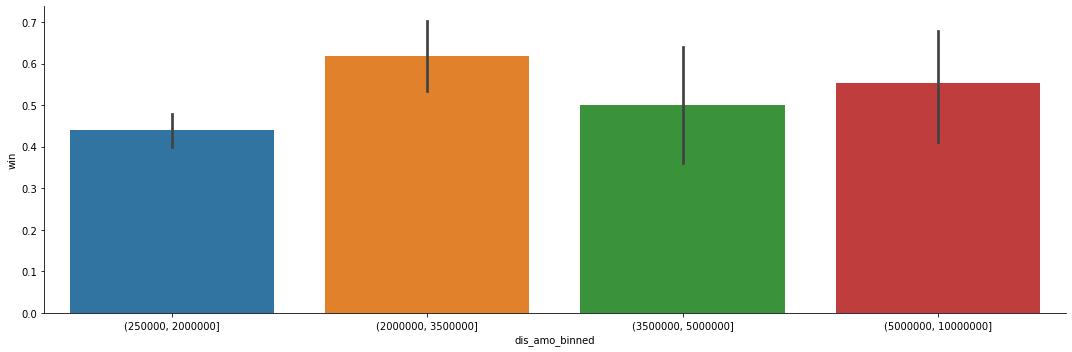

In [57]:
sns.catplot(x='dis_amo_binned',y='win',\
               data=df_2018_house_binned, kind='bar', aspect=3)

### Senate

In [58]:
df_2018_senate_binned = df_2018_senate.copy()

In [59]:
df_2018_senate_binned['dis_amo_binned'] = pd.cut(df_2018_senate_binned.dis_amo, \
                                            bins=[200000, 15000000, 25000000, 30000000, 100000000])

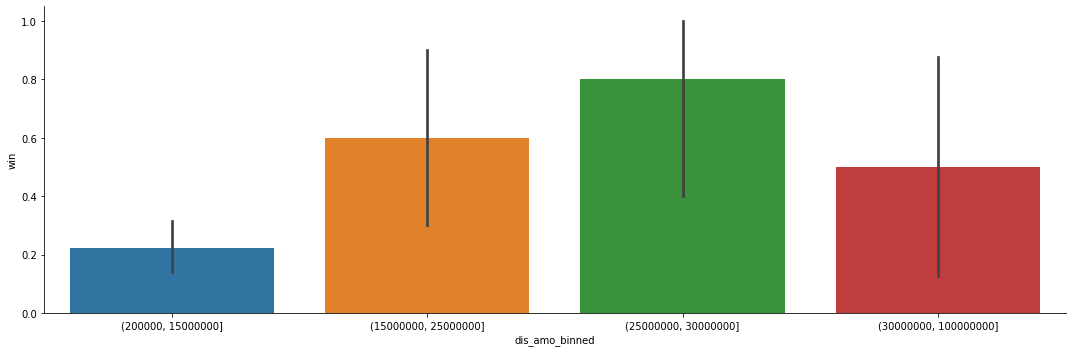

In [60]:
sns.catplot(x='dis_amo_binned',y='win',\
               data=df_2018_senate_binned, kind='bar', aspect=3)

### <div class="alert alert-block alert-warning">Conclusion and Managerial Insight:<br><br>During the election the candidates will have a higher chance to win the seats if they only spend up to certain amount of their disbursement.<br><br>The reason why this might occurred:<br>Candidates might already gain enough popularities from the voters that doesn't need to spend as much as others to win the seat.<br>Also, for the amount differences spent for the Senate or House might be because there are more seats in the House so candidates might not need to spend that much more in order to win the seat.<br><br>The finding is unexpected, usually people would think the more one spend the higher chances to win the election, but it turns out if spend passed certain amount, one will have less chance of winning. For example, if running for Senate and spend passed roughly 86 million dollars, one will have less chance of winning. On the other hand, if running for House and spend passed roughly 7.7 million, one will have less chance to win as well|.<br><br>Therefore,suggested that candidates running for parties other than Democrats and Republicans, one will learn that the more money one spend does not increase the chances of winning, instead spend the money wisely, also try to gain as much as support from the voters.

## <div class="alert alert-block alert-success"><center>Topic Three: What is the Critical Expense to Win?<center>

## <center><li>Examine the Columns Used in This Part

In [61]:
# Columns used in this part
df_2018_main=df_2018[['can_nam','can_off','can_off_sta','dis_pur_des','cat_des','dis_amo', 'win']]
df_2018_main.head()
len(df_2018_main)

,can_nam,can_off,can_off_sta,dis_pur_des,cat_des,dis_amo,win
0,YOUNG-DONALD-E,H,AK,OFFICE JANITORIAL SERVICES,NaN,300.00,1
1,YOUNG-DONALD-E,H,AK,PAYROLL TAXES,NaN,3414.98,1
2,YOUNG-DONALD-E,H,AK,BANK CHARGE,NaN,2.00,1
3,YOUNG-DONALD-E,H,AK,SIGN INSTALLATION,NaN,7000.00,1
4,YOUNG-DONALD-E,H,AK,MAILING POSTAGE,NaN,1394.47,1


973158

In [62]:
# Candidats/Winners numbers in House&Senate
df_2018_main.can_off.unique()

array(['H', 'S'], dtype=object)

In [63]:
df_2018_main.win.unique()

array([1, 0])

In [64]:
df_2018_main[df_2018_main.can_off =='H'].can_nam.nunique()
df_2018_main[df_2018_main.can_off =='S'].can_nam.nunique()

2110

226

In [65]:
len(df_2018_main.can_nam[(df_2018_main['win'] == 1) & (df_2018_main['can_off']=='H')].unique())
len(df_2018_main.can_nam[(df_2018_main['win'] == 1) & (df_2018_main['can_off']=='S')].unique())

433

35

In [66]:
# Campaign states/territories 
df_2018_main.can_off_sta.nunique()
df_2018_main.can_off_sta.unique()

55

array(['AK', 'WI', 'NJ', 'KY', 'MD', 'OH', 'IN', 'CA', 'IL', 'NC', 'MI',
       'GA', 'OR', 'NY', 'MA', 'CT', 'DC', 'MN', 'TX', 'SC', 'VA', 'FL',
       'MS', 'OK', 'ID', 'PA', 'WA', 'CO', 'AL', 'RI', 'UT', 'MO', 'DE',
       'GU', 'TN', 'IA', 'AZ', 'AS', 'LA', 'NE', 'VT', 'MT', 'KS', 'HI',
       'ME', 'NM', 'WY', 'AR', 'NH', 'MP', 'WV', 'NV', 'ND', 'VI', 'SD'],
      dtype=object)

In [67]:
# NaN value check
df_2018_main.isna().sum()

can_nam             0
can_off             0
can_off_sta         0
dis_pur_des         0
cat_des        656649
dis_amo             0
win                 0
dtype: int64

In [68]:
# Check the cat_des column, there're 718,950 items uncategorized!
df_2018_main.cat_des.fillna('Unknown',inplace=True)
df_2018_main.groupby('cat_des').agg({'dis_pur_des':'count','dis_amo':'sum'})

,dis_pur_des,dis_amo
cat_des,,
Administrative/Salary/Overhead Expenses,188391,302521583.65
Advertising Expenses,24705,252840939.15
Campaign Event Expenses,10302,8893313.54
Campaign Materials,9641,22549315.60
Donations,2188,4028827.47
Loan Repayments,729,13162523.70
Political Contributions,6201,34937920.47
Polling Expenses,1339,13484508.29
Solicitation and Fundraising Expenses,36768,74282610.06


<div class="alert alert-block alert-warning">NOTE: <br>Clearly, there's a large part of "unknown" items. <br>The available tags in the cat_des column are not accountable either. <br>Using the codes below, we detected many items with misleading tags.<br>For example, printing expenses are found both with "Advertising Expenses" tag and "Campaign Materials" tag.<br>Transfers could be found in both "Donations" and "Transfers".
<br>Some of the accountants did very sloppy jobs. One entry could be titiled with several accounts in completely different areas. <br>Acually, the classification under "cat_des" cannot be used for data analysis.<br>We need to classify all the items by our selves.

In [69]:
#df_2018_AE=df_2018_main[df_2018_main.cat_des.str.contains('Advertising Expenses')].groupby('dis_pur_des').\
 #agg({'dis_pur_des':'count','dis_amo':'sum'}).rename(columns={'dis_pur_des':'count','dis_amo':'$amount'}).\
 #sort_values(by=['count'],ascending=False)
#df_2018_AE.head(20)

#df_2018_CM=df_2018_main[df_2018_main.cat_des=='Campaign Materials'].groupby('dis_pur_des').\
 #agg({'dis_pur_des':'count','dis_amo':'sum'}).rename(columns={'dis_pur_des':'count','dis_amo':'$amount'}).\
 #sort_values(by=['count'],ascending=False)
#df_2018_CM.head(20)

#df_2018_T=df_2018_main[df_2018_main.cat_des=='Transfers'].groupby('dis_pur_des').\
 #agg({'dis_pur_des':'count','dis_amo':'sum'}).rename(columns={'dis_pur_des':'count','dis_amo':'$amount'}).\
 #sort_values(by=['count'],ascending=False)
#df_2018_T.head(20)

## <center><li>Explore the cate_des Column with Unsupervised Topic Clustering Method

In [70]:
# Get token list "lda_tokens"
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()

def tokenize(text): 
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace(): #skip space
            continue
        elif token.like_num: # delete numbers
            continue
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

# Get the puntuations set
import string
en_punct = set(string.punctuation)

# Get the stop words set
import nltk
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

# Get the tokens for LDA analysis (function)
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

def get_lemma(word):
    return WordNetLemmatizer().lemmatize(word) 

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if token not in en_punct] # delete punctuations
    tokens = [token for token in tokens if len(token) > 1] # at least 2 letters consist a word
    tokens = [token for token in tokens if token not in en_stop] # delete stop words
    tokens = [get_lemma(token) for token in tokens] # delete word variants for accurate result
    return tokens

# Import data for LDA analysis and return text_data
import random
text_data = []
for line in df_2018_main['dis_pur_des']:
    tokens = prepare_text_for_lda(line)
    if random.random() > .99:
        #print(tokens)
        text_data.append(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhanghuishan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhanghuishan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [105]:
# Cluster topics
from gensim import corpora 
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

import gensim # package for topic modeling
NUM_TOPICS = 5 # trial number based on understanding of the data file & research aims, we can lock down this number before presentation
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=20)
ldamodel.save('model.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.176*"travel" + 0.101*"office" + 0.100*"supply" + 0.065*"expense"')
(1, '0.103*"service" + 0.085*"consulting" + 0.072*"fee" + 0.067*"postage"')
(2, '0.084*"advertising" + 0.069*"campaign" + 0.049*"service" + 0.045*"software"')
(3, '0.215*"payroll" + 0.083*"event" + 0.063*"tax" + 0.043*"medium"')
(4, '0.244*"fee" + 0.144*"card" + 0.137*"credit" + 0.136*"processing"')


<div class="alert alert-block alert-warning">From the result above, we could see the model returned us 5 topics with different focuses.
<br>We could have a rough ideas about the topic classification of all the disbursement items.
<br>To validate the result, we bring in pyLDAvis package to analyze the model outcome.

## <center><li>Topic Visualization

In [106]:
# If you still can't see the map after the code is executed, type in this command below in jupiter environment terminal:
# pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install --user

dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model.gensim')
 
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display) 

 <div class="alert alert-block alert-warning">From the map above, we could see the model separated the disbursement items quite well.<br>The classification above has less overlaping now than the classification in the original dataset.<br>But we need to notice that if we run the codes several times, each time we get different clustering results.<br>To make the classification more accurate for further prediction research and analysis, I will bring in the rule-based classification method to tag all the items.

## <center><li>Rule-Based Topic Classification

### Based on my personal understanding of the dataset and political campaign activites, <br>I categorized the disbursement items by the following eight tags.<br> I want to find out which element contributes the most to winning the election.
### **"People Business"**
**Networking**:  The effort to find supporters; 
<br>**Paycheck**:  How much they pay their staff;
<br>**Eat**:  As in a bestseller book title, "don't eat alone"- does dinning together matter? 
<br>**Brain**: How much think tank(consultants, researchers, data analysts, polling analysts) matters?   

###  **"Service and Expense"**
**Advertising**: This might be the largest expense during a campaign, is this large expense useful?   
**Operation cost**: The daily cost of running a campaign team;
<br>**Travel**:  How much visits matters? 
    
###  **"Capital Game"** 
**Finance**: The financial resources candidates can leverage.

## <center><li>Tag Rows Based on Keywords

In [73]:
df_2018_main.head()

,can_nam,can_off,can_off_sta,dis_pur_des,cat_des,dis_amo,win
0,YOUNG-DONALD-E,H,AK,OFFICE JANITORIAL SERVICES,Unknown,300.00,1
1,YOUNG-DONALD-E,H,AK,PAYROLL TAXES,Unknown,3414.98,1
2,YOUNG-DONALD-E,H,AK,BANK CHARGE,Unknown,2.00,1
3,YOUNG-DONALD-E,H,AK,SIGN INSTALLATION,Unknown,7000.00,1
4,YOUNG-DONALD-E,H,AK,MAILING POSTAGE,Unknown,1394.47,1


In [74]:
df_2018_main['dis_purpose']=df_2018_main.dis_pur_des.str.lower()
df_2018_main['networking']=df_2018_main.dis_purpose.str.contains\
                    ('event|catering|gift|gifts|donation|contribution|canvassing|petition|ticket|tickets|sponsorship|membership|vote')*1
df_2018_main['paycheck']=df_2018_main.dis_purpose.str.contains\
                    ('payroll|payrolls|salary|salaries|wage|wages|intern|per diem|stipend|staff|worker|manager|analyst|fundraiser|\
                    |labor|representative')*1
df_2018_main['eat']=df_2018_main.dis_purpose.str.contains\
                    ('food|beverage|drink|drinks|dinner|breakfast|meal|meals|lunch|refreshment')*1
df_2018_main['brain']=df_2018_main.dis_purpose.str.contains\
                    ('polling|poll|survey|consultant|consulting|consult|research|data|legal services|compliance services|\
                    |campaign management|strategy')*1
df_2018_main['advertising']=df_2018_main.dis_purpose.str.contains\
                    ('media|advertising|ad|advertisement|ads|online|digital|facebook|face book|direct mail|sign|signs|marketing|\
                    |video production|photography|internet advertising')*1
df_2018_main['operationcost']=df_2018_main.dis_purpose.str.contains\
                    ('office|telephone|phone|cellphone|call|calls|rent|rental|printing|print|\
                    |shipping|postage|software|fee|fees|t-shirt|t-shirts|supplies|credit card processing fee|credit card processing fees|\
                    |stickers|design|brochures|flowers|expense|expenses|utilities|subscription|bank charge|internet service|\
                    |email service|delivery|storage|website|internet|web|materials|tax|telecommunication|service charge|stamps|\
                    |cc processing|bank charges|mailing|email hosting|computer|wireless|telecom|security|equipment|processing|\
                    |credit card processing fee|credit card fee|insurance|accounting services|accounting')*1
df_2018_main['travel']=df_2018_main.dis_purpose.str.contains\
                    ('travel|hotel|airfare|gas|gasoline|fuel|car|transportation|cab|taxi|parking|mileage|lodging|ride|train|toll')*1
df_2018_main['finance']=df_2018_main.dis_purpose.str.contains\
                    ('fundraising|fundraiser|loan|debt|repayment|repay|transfer|transfers')*1                 
df_2018_main['sum']=df_2018_main.networking+df_2018_main.paycheck+df_2018_main.eat+df_2018_main.brain\
                    +df_2018_main.advertising+df_2018_main.operationcost+df_2018_main.travel+df_2018_main.finance

In [75]:
df_2018_main['sum'].value_counts()
len(df_2018_main)

1    703639
2    208284
0     45194
3     14546
4      1380
5       104
6        11
Name: sum, dtype: int64

973158

## <center><li>Data Preparation: Make Adjustments to Make Sure Each Row Only Have One Tag

In [76]:
# Sum-0 type: add more key words to the tagging codes above (already added above)
df_2018_main_0 = df_2018_main[df_2018_main['sum'] == 0]
df_2018_main_0.groupby('dis_purpose').agg({'dis_purpose':'count','dis_amo':'sum'}).\
     rename(columns={'dis_purpose':'count','dis_amo':'$amount'}).sort_values(by=['count'],ascending=False).head()

# Sum-4/5/6 type: delete them, they put two many disbursement categories under one items, we cannot allocate the $amount to specific uses
df_2018_main_4 = df_2018_main[df_2018_main['sum'] == 4]
df_2018_main_4.groupby('dis_purpose').agg({'dis_purpose':'count','dis_amo':'sum'}).\
     rename(columns={'dis_purpose':'count','dis_amo':'$amount'}).sort_values(by=['count'],ascending=False).head()

df_2018_main_5 = df_2018_main[df_2018_main['sum'] == 5]
df_2018_main_5.groupby('dis_purpose').agg({'dis_purpose':'count','dis_amo':'sum'}).\
     rename(columns={'dis_purpose':'count','dis_amo':'$amount'}).sort_values(by=['count'],ascending=False).head()

df_2018_main_6 = df_2018_main[df_2018_main['sum'] == 6]
df_2018_main_6.groupby('dis_purpose').agg({'dis_purpose':'count','dis_amo':'sum'}).\
     rename(columns={'dis_purpose':'count','dis_amo':'$amount'}).sort_values(by=['count'],ascending=False).head()

,count,$amount
dis_purpose,,
reimbursement (vendors that aggregate over $200 listed below),800,681211.63
see below,690,5066677.78
reimbursement(vendors that aggregate over $200 listed below),506,394018.67
reimbursement - see below if itemized,398,261358.86
dues,386,2406699.49


,count,$amount
dis_purpose,,
fundraiser catering expense,254,194184.28
fundraiser event meals,82,80220.45
"fundraising event exp-signage, printing",68,70707.32
fundraising event expense - food & beverage,63,103573.66
fundraiser meal expense,51,66435.57


,count,$amount
dis_purpose,,
"fundraising expenses, travel, catering & meals",5,45309.45
chase card: fundraiser event - food and beverage,4,2242.85
fundraising consulting/catering/facility rental/travel,4,45491.08
fundraising consulting catering shipping transportation,3,31900.70
fundraising consulting/event catering/travel/shipping,3,44644.41


,count,$amount
dis_purpose,,
fundraising consulting/catering/facility rental/travel/office supplies/delivery service/food/beverag,2,56448.52
"airfare, data service, meals with constituents, payroll software, online software and maintenance",1,4045.08
fundraising consulting / catering / food/beverage / travel / postage,1,23926.22
fundraising consulting food/beverage shipping transportation event gift,1,23940.58
"fundraising consulting, event meal, postage & travel reimbursements",1,9878.73


In [77]:
# Delete unvalid entry records
throwout0 = list(df_2018_main_0.dis_purpose)
wholedata0 = list(df_2018_main.dis_purpose)
rest0 = list(set(wholedata0)^set(throwout0))
df_2018_main = df_2018_main[df_2018_main.dis_purpose.isin(rest0)]

throwout4 = list(df_2018_main_4.dis_purpose)
wholedata4 = list(df_2018_main.dis_purpose)
rest4 = list(set(wholedata4)^set(throwout4))
df_2018_main = df_2018_main[df_2018_main.dis_purpose.isin(rest4)]

throwout5 = list(df_2018_main_5.dis_purpose)
wholedata5 = list(df_2018_main.dis_purpose)
rest5 = list(set(wholedata5)^set(throwout5))
df_2018_main = df_2018_main[df_2018_main.dis_purpose.isin(rest5)]

throwout6 = list(df_2018_main_6.dis_purpose)
wholedata6 = list(df_2018_main.dis_purpose)
rest6 = list(set(wholedata6)^set(throwout6))
df_2018_main = df_2018_main[df_2018_main.dis_purpose.isin(rest6)]

In [78]:
# Result check
df_2018_main.groupby('sum').agg({'sum':'count','dis_amo':'sum'}).\
     rename(columns={'sum':'count','dis_amo':'$amount'}).sort_values(by=['count'],ascending=False)

,count,$amount
sum,,
1,703639,2162680602.02
2,208284,437448303.73
3,14546,52721662.63


In [79]:
# Sum-3 type: manually retag the significant part and 
# delete the items with more than one purposes/insignificant $amount(less than 100k)/occurrance (less than 10)

df_2018_main.loc[df_2018_main['dis_purpose'] == 'internet marketing', 'paycheck'] = 0
df_2018_main.loc[df_2018_main['dis_purpose'] == 'internet marketing', 'operationcost'] = 0
df_2018_main.loc[df_2018_main['dis_purpose'] == 'internet ads', 'paycheck'] = 0
df_2018_main.loc[df_2018_main['dis_purpose'] == 'internet ads', 'operationcost'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('internet advertising and services'), 'paycheck'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('internet advertising and services'), 'operationcost'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('consult'), 'networking'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('consult'), 'paycheck'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('consult'), 'eat'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('consult'), 'finance'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('consult'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('consult'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('consult'), 'travel'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('fundrais'), 'networking'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('fundrais'), 'paycheck'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('fundrais'), 'eat'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('fundrais'), 'brain'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('fundrais'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('fundrais'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('fundrais'), 'travel'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('processing'), 'networking'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('processing'), 'paycheck'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('processing'), 'eat'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('processing'), 'brain'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('processing'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('processing'), 'finance'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('processing'), 'travel'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('advertis'), 'networking'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('advertis'), 'paycheck'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('advertis'), 'eat'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('advertis'), 'brain'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('advertis'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('advertis'), 'finance'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('advertis'), 'travel'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('internet consulting'), 'paycheck'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('internet consulting'), 'brain'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('per diem petition carrier'), 'paycheck'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('per diem petition carrier'), 'travel'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('administrative/salary/overhead expenses'), 'paycheck'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('administrative/salary/overhead expenses'), 'advertising'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('online contribution fees'), 'networking'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('online contribution fees'), 'advertising'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('digital consulting/web service'), 'brain'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('digital consulting/web service'), 'advertising'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('food for fundraiser'), 'paycheck'] = 0 ##

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('food & beverage'), 'networking'] = 0 ##
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('food & beverage'), 'operationcost'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('event meal expense'), 'networking'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('event meal expense'), 'operationcost'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('cable/internet'), 'paycheck'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('cable/internet'), 'travel'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('internet/cable'), 'paycheck'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('internet/cable'), 'travel'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('online /credit card payment fees'), 'travel'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('online /credit card payment fees'), 'advertising'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('payroll administration fees'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('payroll administration fees'), 'advertising'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('salary/fee - administrative support'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('salary/fee - administrative support'), 'advertising'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('staff expenses: campaign management'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('staff expenses: campaign management'), 'paycheck'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('travel expenses - airline tickets'), 'networking'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('travel expenses - airline tickets'), 'operationcost'] = 0

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('voter database software'), 'networking'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('voter database software'), 'brain'] = 0

df_2018_main['sum']=df_2018_main.networking+df_2018_main.paycheck+df_2018_main.eat+df_2018_main.brain\
                    +df_2018_main.advertising+df_2018_main.operationcost+df_2018_main.travel+df_2018_main.finance

In [80]:
# Result check
df_2018_main_3 = df_2018_main[df_2018_main['sum'] == 3]
df_2018_main_3_filter=df_2018_main_3.groupby('dis_purpose').agg({'dis_purpose':'count','dis_amo':'sum'}).\
     rename(columns={'dis_purpose':'count','dis_amo':'$amount'})
df_2018_main_3_filter[(df_2018_main_3_filter['$amount']>100000)&(df_2018_main_3_filter['count']>10)]

,count,$amount
dis_purpose,,


In [81]:
# Delete trivial data
throwout3 = list(df_2018_main_3.dis_purpose)
wholedata3 = list(df_2018_main.dis_purpose)
rest3 = list(set(wholedata3)^set(throwout3))
df_2018_main = df_2018_main[df_2018_main.dis_purpose.isin(rest3)]
len(df_2018_main)#left rows out of 973,158

923417

In [82]:
# Sum-2 type: manually retag the significant part and 
# delete the items with more than one purposes/insignificant $amount(less than 100k)/occurrance (less than 10)

df_2018_main.loc[df_2018_main.dis_purpose.str.contains('accounting'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('accounting'), 'brain'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('accounting'), 'networking'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('accounting'), 'paycheck'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('accounting'), 'eat'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('accounting'), 'finance'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('accounting'), 'travel'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('ad expense'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('001 administrative/salary/overhead'), 'paycheck'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('admin/office expense reimbursement'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('payroll'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('credit card fee'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('direct mail'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('travel expense'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('travel'), 'paycheck'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('event'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('event'), 'eat'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('credit card merchant fee'), 'travel'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('media expense'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('polling expense'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('printing & design services'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('cable tv ad'), 'travel'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('catering/meals'), 'networking'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('catering'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('voter survey'), 'networking'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('web ads'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('web design'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('graphic design'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('design services'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('car rental'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('rental car'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('media production'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('campaign management fee'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('media strategy'), 'brain'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('campaign marketing strategy services'), 'brain'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('voter data'), 'networking'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('print ad'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('office - net salary'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('contribution made'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('design & printing services'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('digital media fee'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('internet service'), 'paycheck'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('candidate and staff travel'), 'paycheck'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('data subscription'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('meal expense'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('campaign food and beverage expense'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('internet'), 'paycheck'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('petition signature collection'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('website hosting - digital images'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('adp wage pay'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('database'), 'brain'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('credit card debt'), 'travel'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('workers compensation insurance'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('lodging expense'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('gross wages. payment made through idm payroll solutions, 1910 olympic blvd, suite 235, walnut creek,'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('office - net wages'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('cartridges'), 'travel'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('cartridges'), 'operationcost'] = 1
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('credit card payment'), 'travel'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('credit card payment'), 'finance'] = 1
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('card print'), 'travel'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('print card'), 'travel'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('card print'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('website design'), 'advertising'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('salary'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('web service/media'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('collateral materials- signs'), 'operationcost'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('staff lodging'), 'paycheck'] = 0
df_2018_main['sum']=df_2018_main.networking+df_2018_main.paycheck+df_2018_main.eat+df_2018_main.brain\
                    +df_2018_main.advertising+df_2018_main.operationcost+df_2018_main.travel+df_2018_main.finance

In [83]:
# Result check
df_2018_main_2 = df_2018_main[df_2018_main['sum'] == 2]
df_2018_main_2_filter = df_2018_main_2.groupby('dis_purpose').agg({'dis_purpose':'count','dis_amo':'sum'}).\
     rename(columns={'dis_purpose':'count','dis_amo':'$amount'})
df_2018_main_2_filter[(df_2018_main_2_filter['$amount']>100000) & (df_2018_main_2_filter['count']>10)].\
sort_values(by='$amount', ascending=False) #unidentifiable items-delete

df_2018_main.groupby('sum').agg({'sum':'count','dis_amo':'sum'}).\
     rename(columns={'sum':'count','dis_amo':'$amount'}).sort_values(by=['count'],ascending=False)

,count,$amount
dis_purpose,,
federal contribution - 30114(a)(4) transfer,17,557500.00


,count,$amount
sum,,
1,869580,2457305264.28
2,28695,75681310.43
0,25142,114548869.03


In [84]:
# Re-adjustment
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('fundrais'),'finance'] = 1
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('processing'),'finance'] = 1
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('database software'),'brain'] = 0
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('database'),'operationcost'] = 1
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('database software'),'operationcost'] = 1
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('database services'),'operationcost'] = 1
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('consulting'),'brain'] = 1
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('advertising'),'advertising'] = 1
df_2018_main.loc[df_2018_main.dis_purpose.str.contains('event expense'),'networking'] = 1

df_2018_main['sum']=df_2018_main.networking+df_2018_main.paycheck+df_2018_main.eat+df_2018_main.brain\
                    +df_2018_main.advertising+df_2018_main.operationcost+df_2018_main.travel+df_2018_main.finance

In [85]:
# Result check
df_2018_main.groupby('sum').agg({'sum':'count','dis_amo':'sum'}).\
     rename(columns={'sum':'count','dis_amo':'$amount'}).sort_values(by=['count'],ascending=False)

,count,$amount
sum,,
1,810443,2452476686.84
2,112509,193826704.71
0,462,490993.80
3,3,741058.39


In [86]:
df_2018_main_2_filter = df_2018_main_2.groupby('dis_purpose').agg({'dis_purpose':'count','dis_amo':'sum'}).\
     rename(columns={'dis_purpose':'count','dis_amo':'$amount'})
df_2018_main_2_filter[(df_2018_main_2_filter['$amount']>100000) & (df_2018_main_2_filter['count']>10)].\
sort_values(by='$amount', ascending=False)

,count,$amount
dis_purpose,,
federal contribution - 30114(a)(4) transfer,17,557500.00


In [87]:
# Delete trivial data
df_2018_main_7 = df_2018_main[df_2018_main['sum'] == 2]
throwout7 = list(df_2018_main_7.dis_purpose)
wholedata7 = list(df_2018_main.dis_purpose)
rest7 = list(set(wholedata7)^set(throwout7))
df_2018_main = df_2018_main[df_2018_main.dis_purpose.isin(rest7)]

df_2018_main_8 = df_2018_main[df_2018_main['sum'] == 0]
throwout8 = list(df_2018_main_8.dis_purpose)
wholedata8 = list(df_2018_main.dis_purpose)
rest8 = list(set(wholedata8)^set(throwout8))
df_2018_main = df_2018_main[df_2018_main.dis_purpose.isin(rest8)]

df_2018_main_9 = df_2018_main[df_2018_main['sum'] == 3]
throwout9= list(df_2018_main_9.dis_purpose)
wholedata9 = list(df_2018_main.dis_purpose)
rest9 = list(set(wholedata9)^set(throwout9))
df_2018_main = df_2018_main[df_2018_main.dis_purpose.isin(rest9)]

## <center><li>Final Dataset for Analysis

In [88]:
# Got the dataset ready! 
# 810443/973158=83.3%
# $2.45billion/$2.87billion=85.4%
df_2018_main.groupby('sum').agg({'sum':'count','dis_amo':'sum'}).\
     rename(columns={'sum':'count','dis_amo':'$amount'}).sort_values(by=['count'],ascending=False)
df_2018_main.head()

,count,$amount
sum,,
1,810443,2452476686.84


,can_nam,can_off,can_off_sta,dis_pur_des,cat_des,dis_amo,win,dis_purpose,networking,paycheck,eat,brain,advertising,operationcost,travel,finance,sum
0,YOUNG-DONALD-E,H,AK,OFFICE JANITORIAL SERVICES,Unknown,300.00,1,office janitorial services,0,0,0,0,0,1,0,0,1
1,YOUNG-DONALD-E,H,AK,PAYROLL TAXES,Unknown,3414.98,1,payroll taxes,0,1,0,0,0,0,0,0,1
2,YOUNG-DONALD-E,H,AK,BANK CHARGE,Unknown,2.00,1,bank charge,0,0,0,0,0,1,0,0,1
3,YOUNG-DONALD-E,H,AK,SIGN INSTALLATION,Unknown,7000.00,1,sign installation,0,0,0,0,1,0,0,0,1
4,YOUNG-DONALD-E,H,AK,MAILING POSTAGE,Unknown,1394.47,1,mailing postage,0,0,0,0,0,1,0,0,1


## <center><li>A Glimpse of Campaign Cost by Category

In [89]:
# Separate house and senate data
df_2018_main_h = df_2018_main[df_2018_main['can_off'] == 'H'][['can_nam','dis_amo','networking', \
                                                               'paycheck', \
                'eat', 'brain', 'advertising', 'operationcost', 'travel', 'finance', 'win']]
df_2018_main_s = df_2018_main[df_2018_main['can_off'] == 'S'][['can_nam','dis_amo','networking', 'paycheck', \
                'eat', 'brain', 'advertising', 'operationcost', 'travel', 'finance', 'win']]

# Creat new dataframe to show money sum under each category
df_2018_main_h_networking = df_2018_main_h[df_2018_main_h.networking==1].groupby('can_nam')\
[['dis_amo']].sum().rename(columns={'dis_amo':'networking_exp'})
df_2018_main_h_paycheck = df_2018_main_h[df_2018_main_h.paycheck==1].groupby('can_nam')\
[['dis_amo']].sum().rename(columns={'dis_amo':'paycheck_exp'})
df_2018_main_h_eat = df_2018_main_h[df_2018_main_h.eat==1].groupby('can_nam')\
[['dis_amo']].sum().rename(columns={'dis_amo':'eat_exp'})
df_2018_main_h_brain = df_2018_main_h[df_2018_main_h.brain==1].groupby('can_nam')\
[['dis_amo']].sum().rename(columns={'dis_amo':'brain_exp'})
df_2018_main_h_advertising = df_2018_main_h[df_2018_main_h.advertising==1].groupby('can_nam')\
[['dis_amo']].sum().rename(columns={'dis_amo':'advertising_exp'})
df_2018_main_h_operationcost = df_2018_main_h[df_2018_main_h.operationcost==1].groupby('can_nam')\
[['dis_amo']].sum().rename(columns={'dis_amo':'operationcost_exp'})
df_2018_main_h_travel = df_2018_main_h[df_2018_main_h.travel==1].groupby('can_nam')\
[['dis_amo']].sum().rename(columns={'dis_amo':'travel_exp'})
df_2018_main_h_finance = df_2018_main_h[df_2018_main_h.finance==1].groupby('can_nam')\
[['dis_amo']].sum().rename(columns={'dis_amo':'finance_exp'})
df_2018_main_h_win = df_2018_main_h[df_2018_main_h.win==1].groupby('can_nam')\
[['win']].sum().rename(columns={'win':'winnerentries'})
df_2018_main_h_win['winner'] = df_2018_main_h_win.winnerentries.apply(lambda x: 1 if x>1 else 0)
df_2018_main_h_win.drop(columns='winnerentries',inplace=True)

df_2018_main_h_m1 = df_2018_main_h_networking.merge(df_2018_main_h_paycheck, \
                                              left_on='can_nam', right_on='can_nam', how='outer')
df_2018_main_h_m2 = df_2018_main_h_m1.merge(df_2018_main_h_eat, \
                                              left_on='can_nam', right_on='can_nam', how='outer')
df_2018_main_h_m3 = df_2018_main_h_m2.merge(df_2018_main_h_brain, \
                                              left_on='can_nam', right_on='can_nam', how='outer')
df_2018_main_h_m4 = df_2018_main_h_m3.merge(df_2018_main_h_advertising, \
                                              left_on='can_nam', right_on='can_nam', how='outer')
df_2018_main_h_m5 = df_2018_main_h_m4.merge(df_2018_main_h_operationcost, \
                                              left_on='can_nam', right_on='can_nam', how='outer')
df_2018_main_h_m6 = df_2018_main_h_m5.merge(df_2018_main_h_travel, \
                                              left_on='can_nam', right_on='can_nam', how='outer')
df_2018_main_h_m7 = df_2018_main_h_m6.merge(df_2018_main_h_finance, \
                                              left_on='can_nam', right_on='can_nam', how='outer')
df_2018_main_h_m8 = df_2018_main_h_m7.merge(df_2018_main_h_win, \
                                              left_on='can_nam', right_on='can_nam', how='outer')
df_2018_main_h_m = df_2018_main_h_m8.fillna(0)

df_2018_main_h_m.loc['h_sum'] = df_2018_main_h_m.apply(lambda x: x.sum())


df_2018_main_s_networking = df_2018_main_s[df_2018_main_s.networking==1].groupby('can_nam')\
[['dis_amo']].sum().rename(columns={'dis_amo':'networking_exp'})
df_2018_main_s_paycheck = df_2018_main_s[df_2018_main_s.paycheck==1].groupby('can_nam')\
[['dis_amo']].sum().rename(columns={'dis_amo':'paycheck_exp'})
df_2018_main_s_eat = df_2018_main_s[df_2018_main_s.eat==1].groupby('can_nam')\
[['dis_amo']].sum().rename(columns={'dis_amo':'eat_exp'})
df_2018_main_s_brain = df_2018_main_s[df_2018_main_s.brain==1].groupby('can_nam')\
[['dis_amo']].sum().rename(columns={'dis_amo':'brain_exp'})
df_2018_main_s_advertising = df_2018_main_s[df_2018_main_s.advertising==1].groupby('can_nam')\
[['dis_amo']].sum().rename(columns={'dis_amo':'advertising_exp'})
df_2018_main_s_operationcost = df_2018_main_s[df_2018_main_s.operationcost==1].groupby('can_nam')\
[['dis_amo']].sum().rename(columns={'dis_amo':'operationcost_exp'})
df_2018_main_s_travel = df_2018_main_s[df_2018_main_s.travel==1].groupby('can_nam')\
[['dis_amo']].sum().rename(columns={'dis_amo':'travel_exp'})
df_2018_main_s_finance = df_2018_main_s[df_2018_main_s.finance==1].groupby('can_nam')\
[['dis_amo']].sum().rename(columns={'dis_amo':'finance_exp'})
df_2018_main_s_win = df_2018_main_s[df_2018_main_s.win==1].groupby('can_nam')\
[['win']].sum().rename(columns={'win':'winnerentries'})
df_2018_main_s_win['winner'] = df_2018_main_s_win.winnerentries.apply(lambda x: 1 if x>1 else 0)
df_2018_main_s_win.drop(columns='winnerentries',inplace=True)

df_2018_main_s_m1 = df_2018_main_s_networking.merge(df_2018_main_s_paycheck, \
                                              left_on='can_nam', right_on='can_nam', how='outer')
df_2018_main_s_m2 = df_2018_main_s_m1.merge(df_2018_main_s_eat, \
                                              left_on='can_nam', right_on='can_nam', how='outer')
df_2018_main_s_m3 = df_2018_main_s_m2.merge(df_2018_main_s_brain, \
                                              left_on='can_nam', right_on='can_nam', how='outer')
df_2018_main_s_m4 = df_2018_main_s_m3.merge(df_2018_main_s_advertising, \
                                              left_on='can_nam', right_on='can_nam', how='outer')
df_2018_main_s_m5 = df_2018_main_s_m4.merge(df_2018_main_s_operationcost, \
                                              left_on='can_nam', right_on='can_nam', how='outer')
df_2018_main_s_m6 = df_2018_main_s_m5.merge(df_2018_main_s_travel, \
                                              left_on='can_nam', right_on='can_nam', how='outer')
df_2018_main_s_m7 = df_2018_main_s_m6.merge(df_2018_main_s_finance, \
                                              left_on='can_nam', right_on='can_nam', how='outer')
df_2018_main_s_m8 = df_2018_main_s_m7.merge(df_2018_main_s_win, \
                                              left_on='can_nam', right_on='can_nam', how='outer')
df_2018_main_s_m = df_2018_main_s_m8.fillna(0)

df_2018_main_s_m.loc['s_sum'] = df_2018_main_s_m.apply(lambda x: x.sum())

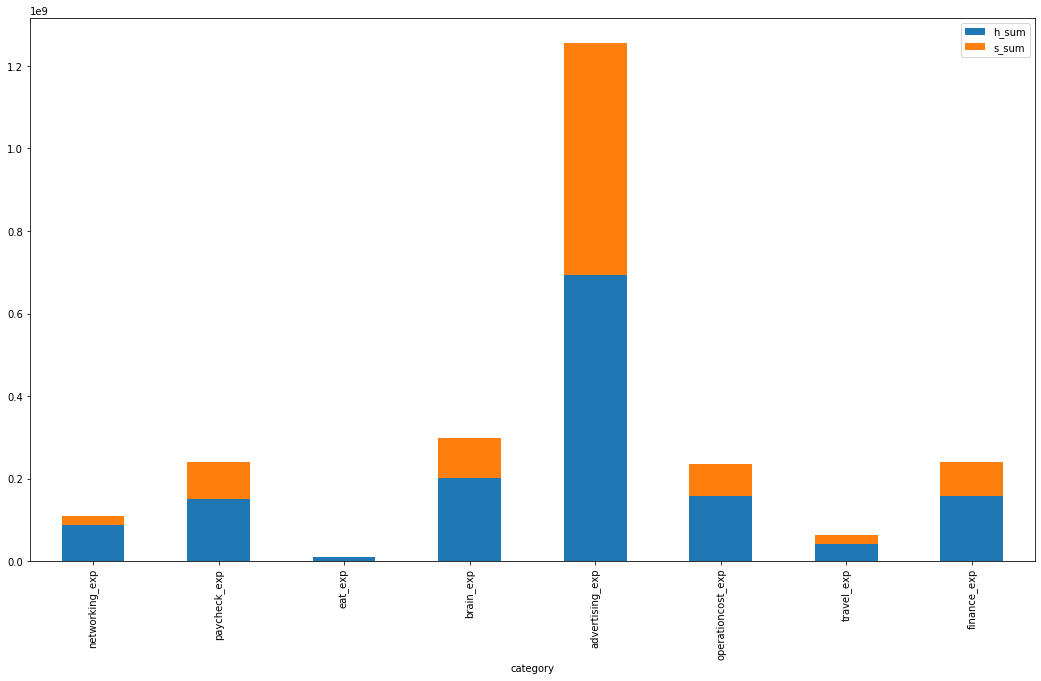

In [90]:
# Draw a plot
h_sum = pd.DataFrame(df_2018_main_h_m.iloc[2093,:]).reset_index().rename(columns={'index':'category'})
s_sum = pd.DataFrame(df_2018_main_s_m.iloc[225,:]).reset_index().rename(columns={'index':'category'})
df_2018_catsum = h_sum.merge(s_sum,left_on = 'category', right_on = 'category', how='outer')
df_2018_catsum = df_2018_catsum.set_index('category')
df_2018_catsum = df_2018_catsum.drop(['winner'],axis=0)

plt.rcParams["figure.figsize"] = (18,10)
df_2018_catsum.plot.bar(stacked=True) 

<div class="alert alert-block alert-warning">Both House and Senate candidates spent way more money on advertising than the other expense categories. <br>Is advertising the crucial factor in election? Did the advertising expense pay off?

## <center><li>Machine Learning: Decision Tree

## What is the Crucial Expense in Campaign?

### Run for House:

In [91]:
df_2018_main_h_m.tail()

,networking_exp,paycheck_exp,eat_exp,brain_exp,advertising_exp,operationcost_exp,travel_exp,finance_exp,winner
can_nam,,,,,,,,,
HAULMARK-CHRIS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1760.00,0.00
TUTTLE-CHARLES,0.00,0.00,0.00,0.00,0.00,0.00,0.00,750.00,0.00
VARASTEH-RON,0.00,0.00,0.00,0.00,0.00,0.00,0.00,250000.00,0.00
WYNN-QUENTIN-ADAM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4454.29,0.00
h_sum,88291281.65,151327111.22,9017008.74,202143112.62,693478394.56,158355931.14,42058259.64,158802520.45,433.00


In [92]:
df_2018_main_h_m.drop(['h_sum'],inplace=True)

In [93]:
df_2018_main_h_m.tail()

,networking_exp,paycheck_exp,eat_exp,brain_exp,advertising_exp,operationcost_exp,travel_exp,finance_exp,winner
can_nam,,,,,,,,,
EDWARDS-DEJUAN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,619.85,0.00
HAULMARK-CHRIS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1760.00,0.00
TUTTLE-CHARLES,0.00,0.00,0.00,0.00,0.00,0.00,0.00,750.00,0.00
VARASTEH-RON,0.00,0.00,0.00,0.00,0.00,0.00,0.00,250000.00,0.00
WYNN-QUENTIN-ADAM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4454.29,0.00


In [94]:
Y = df_2018_main_h_m.winner
X = df_2018_main_h_m.drop('winner', axis=1)
dt=tree.DecisionTreeClassifier(max_depth=1)
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

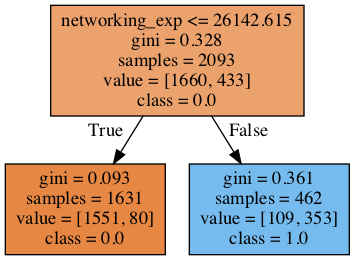

In [95]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

## Funding Validation

In [96]:
df_2018_main_h_m.networking_exp.describe()

count      2093.00
mean      42184.08
std      147503.09
min           0.00
25%           0.00
50%        2500.00
75%       19775.94
max     3928521.02
Name: networking_exp, dtype: float64

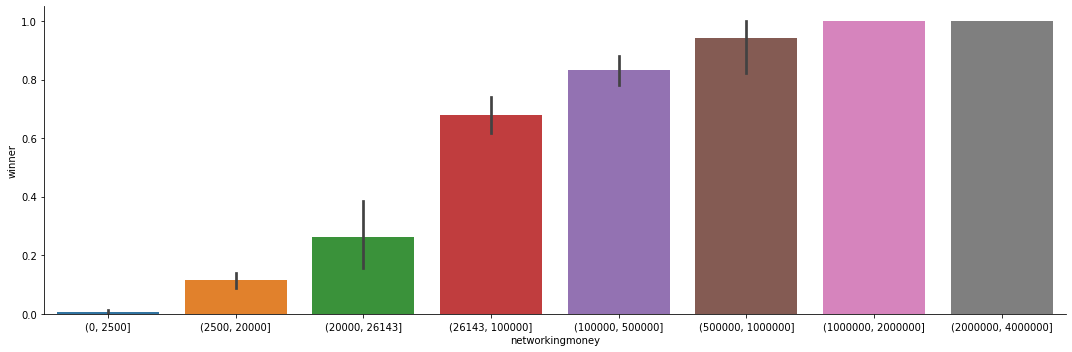

In [97]:
df_2018_main_h_m['networkingmoney']=pd.cut(df_2018_main_h_m.networking_exp, \
                                           bins=(0,2500,20000,26143,100000, 500000,1000000, 2000000,4000000))
sns.factorplot(x='networkingmoney', y='winner', kind = 'bar', data=df_2018_main_h_m, aspect=3) #500,000-0.8; 

### <div class="alert alert-block alert-warning">Conclusion and Managerial Insight:<br><br>From the decision tree and chart above, we could see that networking is the most critical factor to winning the House election. To secure the election result, at least half a million should be spent on networking activities such as event, gift, donation etc.<br><br>When compared with the expense totals of each category, we find that even thought advertising costs the most in a campaign trial, it's not the critical factor of a candidats's winning!<br><br>Candidates running for an M.H.R. seat better save 1 million dollars for networking and try to cut down advertising cost, think tank cost and operation cost.

### Run for Senate: 

In [98]:
df_2018_main_s_m.tail()

,networking_exp,paycheck_exp,eat_exp,brain_exp,advertising_exp,operationcost_exp,travel_exp,finance_exp,winner
can_nam,,,,,,,,,
NABLIBA-MARIO,0.00,0.00,0.00,0.00,0.00,294.56,459.57,4430.00,0.00
PIPER-JOHN-PATRICK,0.00,0.00,0.00,0.00,0.00,331.66,0.00,0.00,0.00
STOKES-STEVE,0.00,0.00,0.00,0.00,0.00,499.20,0.00,33.75,0.00
SINGER-JAMES-COURAGE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,376.15,0.00
s_sum,21408619.69,88087126.21,1871219.50,96204947.95,560920300.37,78198938.75,21901165.13,80410749.22,35.00


In [99]:
df_2018_main_s_m.drop(['s_sum'],inplace=True)

In [100]:
df_2018_main_s_m.tail()

,networking_exp,paycheck_exp,eat_exp,brain_exp,advertising_exp,operationcost_exp,travel_exp,finance_exp,winner
can_nam,,,,,,,,,
MARKS-DOUG,0.00,0.00,0.00,0.00,0.00,162.23,0.00,0.00,0.00
NABLIBA-MARIO,0.00,0.00,0.00,0.00,0.00,294.56,459.57,4430.00,0.00
PIPER-JOHN-PATRICK,0.00,0.00,0.00,0.00,0.00,331.66,0.00,0.00,0.00
STOKES-STEVE,0.00,0.00,0.00,0.00,0.00,499.20,0.00,33.75,0.00
SINGER-JAMES-COURAGE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,376.15,0.00


In [101]:
Y = df_2018_main_s_m.winner
X = df_2018_main_s_m.drop('winner', axis=1)
dt=tree.DecisionTreeClassifier(max_depth=1)
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

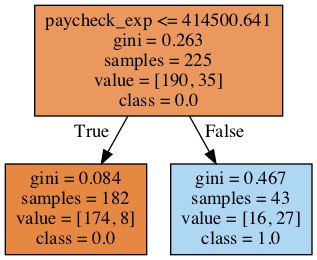

In [102]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

## Funding Validation

In [103]:
df_2018_main_s_m.paycheck_exp.describe()

count        225.00
mean      391498.34
std      1211095.51
min            0.00
25%            0.00
50%          239.93
75%       212355.25
max     13926912.54
Name: paycheck_exp, dtype: float64

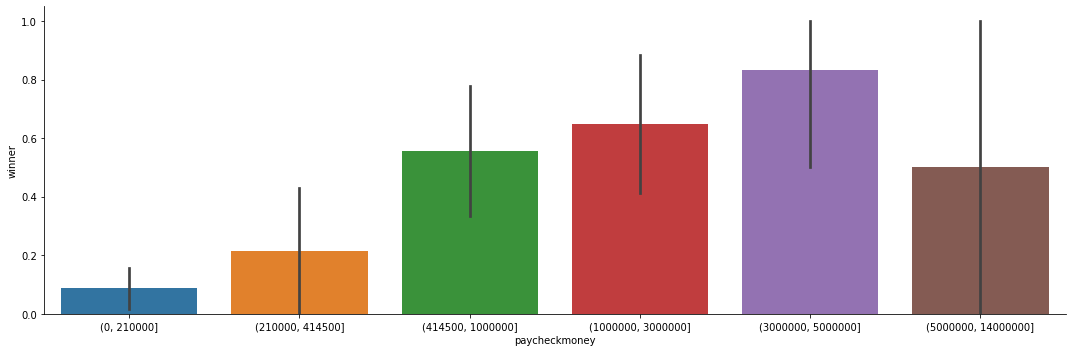

In [104]:
df_2018_main_s_m['paycheckmoney']=pd.cut(df_2018_main_s_m.paycheck_exp, \
                                           bins=(0,210000,414500,1000000,3000000,5000000,14000000))
sns.factorplot(x='paycheckmoney', y='winner', kind = 'bar', data=df_2018_main_s_m, aspect=3)

### <div class="alert alert-block alert-warning">Conclusion and Managerial Insight:<br><br>From the decision tree and chart above, we could see that staff paycheck is the most critical factor to winning the Senate election. To secure the election result, at least 400 thousand dollars should be spent on campaign team paychecks; 3-5 millions could be the most suitable budget. And it's not that the more staff you hire, the better the election result gets. Clearly the campaign team should be kept at a reasonable size. Any candidate spends more than 5 million dollars on paycheck could think of downsizing his/her team.